In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data2=pd.read_csv(r"C:\Users\HP\Downloads\archive (20)\Housing.csv")
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Preprocessing

In [3]:
#null values
data2.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [4]:
#encode
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data2['mainroad_encode']=le.fit_transform(data2['mainroad'])
data2['guestroom_encode']=le.fit_transform(data2['guestroom'])
data2['basement_encode']=le.fit_transform(data2['basement'])
data2['hotwaterheating_encode']=le.fit_transform(data2['hotwaterheating'])
data2['airconditioning_encode']=le.fit_transform(data2['airconditioning'])
data2['prefarea_encode']=le.fit_transform(data2['prefarea'])
data2['furnishingstatus_encode']=le.fit_transform(data2['furnishingstatus'])
data2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_encode,guestroom_encode,basement_encode,hotwaterheating_encode,airconditioning_encode,prefarea_encode,furnishingstatus_encode
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,1,0,0,0,1,1,0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,1,0,0,0,1,0,0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,1,0,1,0,0,1,1
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,1,0,1,0,1,1,0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,1,1,1,0,1,0,0


In [5]:
X=data2.drop('price',axis=1)
y=data2['price']

In [6]:
X=X.drop(['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus'],axis=1)
X.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_encode,guestroom_encode,basement_encode,hotwaterheating_encode,airconditioning_encode,prefarea_encode,furnishingstatus_encode
0,7420,4,2,3,2,1,0,0,0,1,1,0
1,8960,4,4,4,3,1,0,0,0,1,0,0
2,9960,3,2,2,2,1,0,1,0,0,1,1
3,7500,4,2,2,3,1,0,1,0,1,1,0
4,7420,4,1,2,2,1,1,1,0,1,0,0


In [7]:
#normalization
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
data3=ms.fit_transform(X)
data2=pd.DataFrame(data3,columns=X.columns)
data2.head()

,area,bedrooms,bathrooms,stories,parking,mainroad_encode,guestroom_encode,basement_encode,hotwaterheating_encode,airconditioning_encode,prefarea_encode,furnishingstatus_encode
0,0.396564,0.6,0.333333,0.666667,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,0.666667,1.0,0.0,1.0,0.0,0.0,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.000000,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.396564,0.6,0.000000,0.333333,0.666667,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [8]:
# outliers removal
data4=X.copy()
data4['target'] =y
Q1=data4['target'].quantile(0.25)
Q3=data4['target'].quantile(0.75)
IQR=Q3-Q1
mask=(data4['target']>=Q1-1.5*IQR)&(data4['target']<=Q3+1.5*IQR)
data4_filter=data4[mask]
X_filter=data4_filter.drop(columns='target')
y_filter=data4_filter['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_filter,y_filter,test_size=0.2,random_state=52)

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
boost=GradientBoostingRegressor(n_estimators=100,max_depth=5,random_state=42,subsample=0.8,learning_rate=0.03,min_samples_split=6,max_features=8)
boost.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.03, max_depth=5, max_features=8,
                          min_samples_split=6, random_state=42, subsample=0.8)

In [11]:
boost.score(X_test,y_test)

0.7421673522521668

In [12]:
y_pred=boost.predict(X_test)

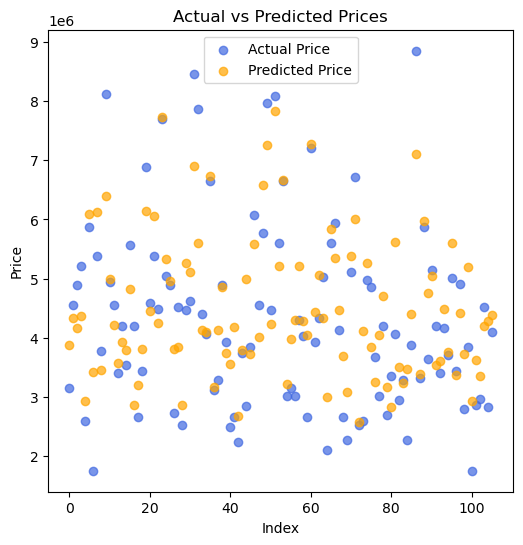

In [13]:
index=np.arange(len(y_test))
plt.figure(figsize=(6,6))
plt.scatter(index,y_test,color='royalblue',alpha=0.7,label='Actual Price')
plt.scatter(index,y_pred,color='orange',alpha=0.7,label='Predicted Price')
plt.xlabel("Index")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices")
plt.legend()
plt.savefig('Actual vs predicted price')

In [17]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
rme=root_mean_squared_error(y_test,y_pred)
print('Mean absolute error ',mae)
print('Root mean square error ',rme)

Mean absolute error  612511.5728240715
Root mean square error  791340.0759610801
